## Loading Dataset Using Pandas
We can use `pandas.read_csv()` to load a dataset from a remote URL or local file.

In [1]:
from pandas import read_csv

url = 'https://raw.githubusercontent.com/erojaso/MLMasteryEndToEnd/master/data/pima-indians-diabetes.data.csv'
column_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# Load CSV using Pandas
data = read_csv(url, names=column_names)
print(data)

     preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]


## Peeking into the Data
You can view the first few rows using `.head()` and check the overall dimensions with .shape.

In [2]:
peek = data.head(10)  # Peek into first 10 rows
print(peek)

# Get number of rows and columns
print(data.shape)

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1
(768, 9)


## Understanding the Dataset
We can inspect data types and generate summary statistics to understand the dataset better.

In [3]:
# Data types of each column
types = data.dtypes
print(types)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [4]:
# Set display options for better readability
from pandas import set_option
set_option('display.width', 100)
set_option('display.precision', 3)  # Limit decimals

# Summary statistics for each column
description = data.describe()
print(description)

          preg     plas     pres     skin     test     mass     pedi      age    class
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241    0.349
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760    0.477
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000    0.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000    0.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000    0.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000    1.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000    1.000


## Class Distribution
Understanding how many samples belong to each class helps in identifying imbalance.

In [5]:
# Count of instances in each class (0 = non-diabetic, 1 = diabetic)
class_counts = data.groupby('class').size()
print(class_counts)

class
0    500
1    268
dtype: int64


## Pearson’s Correlation Coefficient
Pearson’s correlation measures the linear relationship between features. Values range between -1 to 1:

* 1 → strong positive correlation

* -1 → strong negative correlation

* 0 → no correlation

Highly correlated features can degrade model performance.

In [6]:
# Display options for correlation matrix
set_option('display.width', 100)
set_option('display.precision', 3)

# Compute Pearson correlation between attributes
correlations = data.corr(method='pearson')
print(correlations)

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


## Correlation Heatmap
A visual heatmap helps quickly identify strong/weak correlations between features.

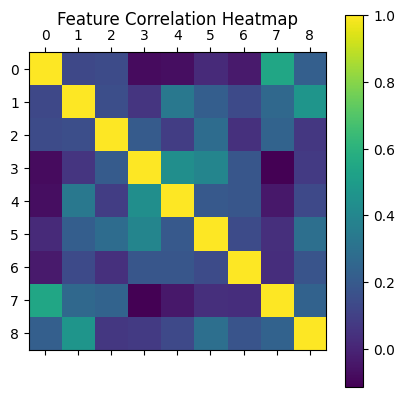

In [7]:
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.matshow(correlations)
plt.title("Feature Correlation Heatmap", pad=20)
plt.colorbar()
plt.show()

## Skewness of Features
Skewness measures the asymmetry of the distribution of data. A high skew can affect the performance of some algorithms.

In [8]:
# Check the skewness of distribution for each attribute
skew = data.skew()
print(skew)

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64
